In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from IPython.display import display

groups = 7
heuristicvalues = []
id_values = []
labels = ('Random', 'MM_Open', 'MM_Center', 'MM_Improved', 'AB_Open', 'AB_Centered', 'AB_Improved')

index = np.arange(groups)
bar_width = 0.35

def plot_graph_tables(AB_I_values, heuristic_values, label):
    data = {'ID_Improved Agent Wins (Out of 10)': AB_I_values, 'Custom Agent Wins (Out of 10)': heuristic_values}
    dataframe = pd.DataFrame(data)
    display(dataframe)
    AB_values = AB_I_values
    custom_agent_values = heuristic_values
    plot.bar(index, AB_values, bar_width,
             color='b',
             label='AB_Improved Agent')

    plot.bar(index + bar_width, custom_agent_values, bar_width,
                     color='r', label = label)

    plot.xlabel('Agents')
    plot.ylabel('Wins (OUT OF 20)')
    plot.title('AB_Improved V/s Custom Agents')
    plot.xticks(index + bar_width / 2, labels)
    plot.rcParams["figure.figsize"] = [20, 5]
    plot.legend()
    plot.show()
    

,Custom Agent Wins (Out of 10),ID_Improved Agent Wins (Out of 10)
0,10,10
1,8,9
2,10,10
3,9,9
4,4,5
5,8,7
6,5,6


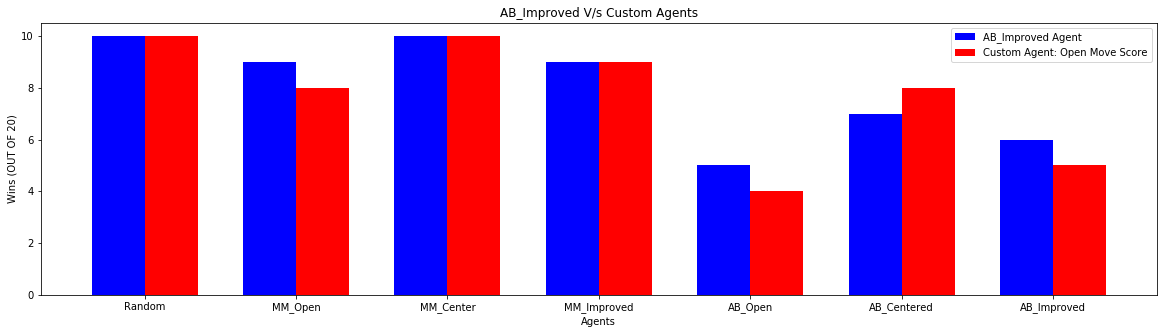

In [20]:
#1st Trial

AB_improved_values = [10, 9, 10, 9, 5, 7, 6]
heuristic_1_values = [10, 8, 10, 9, 4, 8, 5]
label = 'Custom Agent: Open Move Score'
plot_graph_tables(AB_improved_values, heuristic_1_values, label)

In [2]:
directions = {
            (-1, -1): [(-1, 2), (2, -1)], # top left
            (1, -1): [(1, 2), (-2, 1)],  # top right
            (-1, 1): [(-1, -2), (1, 2)],  # bottom left
            (1, 1): [(-1, 2), (1, -2)]     # bottom right
            }

for keys, values in directions.items():
    print(keys,"<-X-X->",values)

(-1, -1) <-X-X-> [(-1, 2), (2, -1)]
(1, -1) <-X-X-> [(1, 2), (-2, 1)]
(-1, 1) <-X-X-> [(-1, -2), (1, 2)]
(1, 1) <-X-X-> [(-1, 2), (1, -2)]


In [4]:
# Bottoms Up
# Use Random Blocking to see how safe certain moves in cells are.
# Moves Safety (Living to die another day)
import math, numpy
import pandas
from isolation import Board

def applymoves(cell):
    newgame = Board(1,0)
    newgame.apply_move(cell)
    playermoves  = newgame.get_legal_moves()
    vectors = ((-2, -1), (-2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2), (2, -1), (2, 1))
    nextmovescore = len([(cell[0] + ray_[0], cell[1] + ray_[1])
                    for ray_ in vectors if (cell[0] + ray_[0], cell[1] + ray_[1]) in playermoves ])
    return nextmovescore

newgame = Board(1,0)
allcells = newgame.get_blank_spaces()
movesdict = {}

for cell in allcells:
    #print (cell)
    ID = str(cell)
    COUNT = applymoves(cell)
    movesdict[ID] = COUNT
    newgame = Board(1,0)

for key in movesdict:
    print(key,":",movesdict[key])
        

(0, 0) : 2
(1, 0) : 3
(2, 0) : 4
(3, 0) : 4
(4, 0) : 4
(5, 0) : 3
(6, 0) : 2
(0, 1) : 3
(1, 1) : 4
(2, 1) : 6
(3, 1) : 6
(4, 1) : 6
(5, 1) : 4
(6, 1) : 3
(0, 2) : 4
(1, 2) : 6
(2, 2) : 8
(3, 2) : 8
(4, 2) : 8
(5, 2) : 6
(6, 2) : 4
(0, 3) : 4
(1, 3) : 6
(2, 3) : 8
(3, 3) : 8
(4, 3) : 8
(5, 3) : 6
(6, 3) : 4
(0, 4) : 4
(1, 4) : 6
(2, 4) : 8
(3, 4) : 8
(4, 4) : 8
(5, 4) : 6
(6, 4) : 4
(0, 5) : 3
(1, 5) : 4
(2, 5) : 6
(3, 5) : 6
(4, 5) : 6
(5, 5) : 4
(6, 5) : 3
(0, 6) : 2
(1, 6) : 3
(2, 6) : 4
(3, 6) : 4
(4, 6) : 4
(5, 6) : 3
(6, 6) : 2


In [5]:
# What are the Grid's Centrality Values ?
import math, numpy
import pandas

def distance(game, move1, move2 = None):

    cx, cy = math.ceil((game.width-1) /2), math.ceil((game.height-1) /2)
    
    if move2:
        return (move1[0] - move2[0]) ** 2 + (move1[1] - move2[0]) ** 2
    else:
        return (move1[0] - cx) ** 2 + (move1[1] - cy) ** 2

from isolation import Board
newgame = Board(1,0)

allcells = newgame.get_blank_spaces()
centerdict = {}

for cell in allcells:
    #print (cell)
    newgame.apply_move(cell)
    ID = str(cell)
    CNT = distance(newgame, cell)
    centerdict[ID] = CNT
    newgame = Board(1,0)

for key in movesdict:
    print(key,":",centerdict[key])


(0, 0) : 18
(1, 0) : 13
(2, 0) : 10
(3, 0) : 9
(4, 0) : 10
(5, 0) : 13
(6, 0) : 18
(0, 1) : 13
(1, 1) : 8
(2, 1) : 5
(3, 1) : 4
(4, 1) : 5
(5, 1) : 8
(6, 1) : 13
(0, 2) : 10
(1, 2) : 5
(2, 2) : 2
(3, 2) : 1
(4, 2) : 2
(5, 2) : 5
(6, 2) : 10
(0, 3) : 9
(1, 3) : 4
(2, 3) : 1
(3, 3) : 0
(4, 3) : 1
(5, 3) : 4
(6, 3) : 9
(0, 4) : 10
(1, 4) : 5
(2, 4) : 2
(3, 4) : 1
(4, 4) : 2
(5, 4) : 5
(6, 4) : 10
(0, 5) : 13
(1, 5) : 8
(2, 5) : 5
(3, 5) : 4
(4, 5) : 5
(5, 5) : 8
(6, 5) : 13
(0, 6) : 18
(1, 6) : 13
(2, 6) : 10
(3, 6) : 9
(4, 6) : 10
(5, 6) : 13
(6, 6) : 18


In [8]:
#creating a composite: early game to end game
#minimizing moves: not a priority, good thing if it happens! --> critical
#centrality: high priority --> low priority
#chase: no priority --> high/strict priority

#logic
#chase --> distance to opponent is less than 1 or 2 game moves worth of length
#chase --> map(distance: player location, opponent location) <= one / half * size(quadrant)
#chase --> quadrant distance located near or far from centre

#centrality --> distance (centre, move) 4 maximas along diagonals, 4 minimas along orthogonal
#centrality --> maximise without compromising moves, minimise without too

#moves --> len(pmoves)-(omoves)*num, agressive: num >= 1, relaxed: num <= 1
#moves --> 

compositevalues = {}

for keys in movesdict:
    compositevalues[keys] = movesdict[keys] - centerdict[keys]

for key in compositevalues:
    print(key,":",compositevalues[key])

(0, 0) : -16
(1, 0) : -10
(2, 0) : -6
(3, 0) : -5
(4, 0) : -6
(5, 0) : -10
(6, 0) : -16
(0, 1) : -10
(1, 1) : -4
(2, 1) : 1
(3, 1) : 2
(4, 1) : 1
(5, 1) : -4
(6, 1) : -10
(0, 2) : -6
(1, 2) : 1
(2, 2) : 6
(3, 2) : 7
(4, 2) : 6
(5, 2) : 1
(6, 2) : -6
(0, 3) : -5
(1, 3) : 2
(2, 3) : 7
(3, 3) : 8
(4, 3) : 7
(5, 3) : 2
(6, 3) : -5
(0, 4) : -6
(1, 4) : 1
(2, 4) : 6
(3, 4) : 7
(4, 4) : 6
(5, 4) : 1
(6, 4) : -6
(0, 5) : -10
(1, 5) : -4
(2, 5) : 1
(3, 5) : 2
(4, 5) : 1
(5, 5) : -4
(6, 5) : -10
(0, 6) : -16
(1, 6) : -10
(2, 6) : -6
(3, 6) : -5
(4, 6) : -6
(5, 6) : -10
(6, 6) : -16


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy

def plot_3d_contour(x_dim=7, y_dim=7, x_steps=1, y_steps=1, scalar_field, file_path):
    fig = plt.figure()

    x, y = numpy.mgrid[-x_dim/2:x_dim/2:x_steps*1j, -y_dim/2:y_dim/2:y_steps*1j]
    v_min = numpy.min(scalar_field)
    v_max = nupmy.max(scalar_field)

    ax = fig.gca(projection='3d')

    cset = ax.contourf(x, y, scalar_field, zdir='z', offset=v_min, cmap=cm.coolwarm)
    cset = ax.contourf(x, y, scalar_field, zdir='x', offset=-x_dim/2-1, cmap=cm.coolwarm)
    cset = ax.contourf(x, y, scalar_field, zdir='y', offset=y_dim/2+1, cmap=cm.coolwarm)

    ax.plot_surface(x, y, scalar_field, rstride=10, cstride=10, alpha=0.3)

    ax.set_xlabel('X')
    ax.set_xlim(-x_dim/2-1, x_dim/2+1)
    ax.set_ylabel('Y')
    ax.set_ylim(-y_dim/2-1, y_dim/2+1)
    ax.set_zlabel('Z')
    ax.set_zlim(v_min, v_max)

    plt.savefig(file_path + '.jpg')
    plt.close()


plot_3d_contour(12, 12, 100, 100, scalar_field, 'scalar_field3D')

SyntaxError: non-default argument follows default argument (<ipython-input-6-caecdb07b698>, line 6)

In [10]:
def scalar(valuesdict):
   scalarize = lambda dictionary: [(i, xy[0], xy[1], z) for i,xy,z in enumerate(dictionary)]
   NX = numpy.array(scalarize(valuesdict))
   print(scalarize(valuesdict))

scalar(compositevalues)

ValueError: not enough values to unpack (expected 3, got 2)

In [89]:
import pandas as pd
from IPython.display import display
mask = lambda Xx:[[Xt for Xt in [x,y[0][1],y[0][-2],y[1]]]for x,y in enumerate(Xx.items())]
PDnow = pd.DataFrame()
for Xn in mask(movesdict):
    #print(Xn, "\n")
    PDnow.update(Xn)

display(PDnow,)

TypeError: publish() got an unexpected keyword argument 'transient'